In [187]:
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import numpy as np 

### 1. SWaT Data

In [188]:
def normalize2(a, min_a = None, max_a = None):
	if min_a is None: min_a, max_a = min(a), max(a)
	return (a - min_a) / (max_a - min_a), min_a, max_a

In [189]:
dataset_folder = 'TranAD_dataset/SWaT'
file = os.path.join(dataset_folder, 'series.json')
df = pd.read_json(file, lines=True)
df.sample(5)

,ts,val,sco,pred,pmin,pmax,noti,pminModel,pmaxModel
8069,1495408935,362.02667,NaN,NaN,NaN,NaN,False,NaN,NaN
11560,1496455935,371.31000,0.504073,342.4546,294.8049,428.35556,False,NaN,NaN
1579,1493463135,374.21667,NaN,NaN,NaN,NaN,False,NaN,NaN
4012,1494192735,365.67000,NaN,NaN,NaN,NaN,False,NaN,NaN
4809,1494431535,469.86667,NaN,NaN,NaN,NaN,False,NaN,NaN


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12087 entries, 0 to 12086
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         12087 non-null  int64  
 1   val        12087 non-null  float64
 2   sco        3584 non-null   float64
 3   pred       3589 non-null   float64
 4   pmin       3589 non-null   float64
 5   pmax       3589 non-null   float64
 6   noti       12087 non-null  bool   
 7   pminModel  50 non-null     float64
 8   pmaxModel  50 non-null     float64
dtypes: bool(1), float64(7), int64(1)
memory usage: 767.4 KB


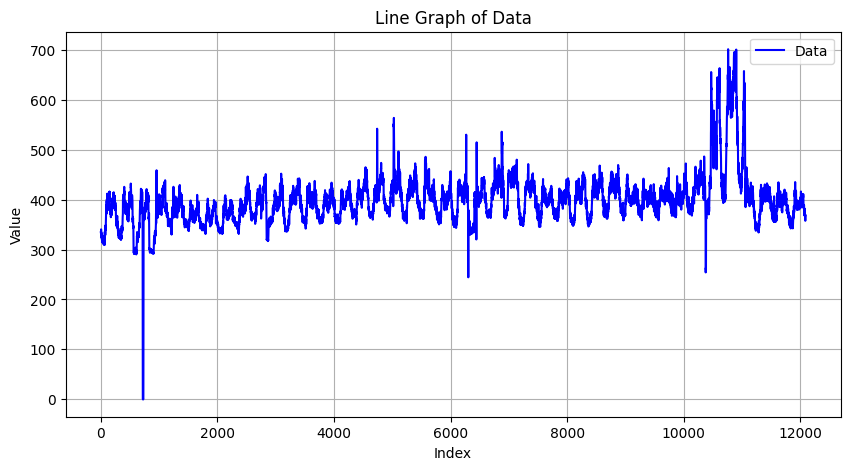

In [191]:
data_flat = df['val'].values.flatten()

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(data_flat, label='Data', color='b')
plt.title('Line Graph of Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

In [192]:
# dataset_folder = 'data/SWaT'
file = os.path.join(dataset_folder, 'series.json')
df_train = pd.read_json(file, lines=True)[['val']][3000:6000]
df_test  = pd.read_json(file, lines=True)[['val']][7000:12000]
train, min_a, max_a = normalize2(df_train.values)
test, _, _ = normalize2(df_test.values, min_a, max_a)
labels = pd.read_json(file, lines=True)[['noti']][7000:12000] + 0

In [193]:
labels.describe()

,noti
count,5000.000000
mean,0.128800
std,0.335012
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [194]:
labels_data_flat = labels.values.flatten()
labels_data_flat

array([0, 0, 0, ..., 0, 0, 0])

In [195]:
anomaly_indices = np.where(labels_data_flat == 1)[0]
anomaly_indices.shape 

(644,)

In [196]:
df['class_label'] = (df.index.isin(anomaly_indices) == False).astype(int)
df.sample(10)

,ts,val,sco,pred,pmin,pmax,noti,pminModel,pmaxModel,class_label
9107,1495720335,403.16333,0.468544,400.11356,354.33334,466.03763,False,NaN,NaN,1
5453,1494624735,382.12000,NaN,NaN,NaN,NaN,False,NaN,NaN,1
6484,1494933735,385.39334,NaN,NaN,NaN,NaN,False,NaN,NaN,1
1942,1493572035,395.65000,NaN,NaN,NaN,NaN,False,NaN,NaN,1
4312,1494282435,369.45334,NaN,NaN,NaN,NaN,False,NaN,NaN,1
1332,1493389035,392.67000,NaN,NaN,NaN,NaN,False,NaN,NaN,1
4798,1494428235,448.26334,NaN,NaN,NaN,NaN,False,NaN,NaN,1
3928,1494167535,420.37668,NaN,NaN,NaN,NaN,False,NaN,NaN,1
11351,1496393235,396.92667,0.454263,405.71713,366.40300,489.48917,False,NaN,NaN,1
5370,1494599835,429.76000,NaN,NaN,NaN,NaN,False,NaN,NaN,1


In [197]:
df.class_label.value_counts()

class_label
1    11443
0      644
Name: count, dtype: int64

In [198]:
df.pmax.isna()

0         True
1         True
2         True
3         True
4         True
         ...  
12082    False
12083    False
12084    False
12085    False
12086    False
Name: pmax, Length: 12087, dtype: bool

In [199]:
df.sco.isna().value_counts()

sco
True     8503
False    3584
Name: count, dtype: int64

In [200]:
df.pminModel.nunique(), df.pminModel.isna().value_counts()

(44,
 pminModel
 True     12037
 False       50
 Name: count, dtype: int64)

In [201]:
cols_to_drop = ['noti', 'pmin', 'pmax', 'pminModel', 'pmaxModel', 'sco', 'pred']
for col in cols_to_drop:
    print(col)
    df = df.drop(col, axis=1)

noti
pmin
pmax
pminModel
pmaxModel
sco
pred


In [202]:
df = df.fillna(0)
df.sample(10)

,ts,val,class_label
768,1493219835,394.13333,1
4061,1494207135,368.93000,1
8881,1495652535,437.21335,1
5175,1494541335,379.72665,1
8946,1495672035,368.66666,1
10758,1496215335,662.38000,1
10276,1496070735,438.87000,1
9094,1495716435,390.67667,1
5413,1494612735,437.92000,1
441,1493117235,377.09668,1


In [203]:
df.to_csv('swat.csv')

### 2. SMD

In [204]:
dataset_folder = '../../TranAD/data/SMD'
output_folder = 'processed'

def load_dataset(category, filename, dataset, dataset_folder):
    temp = np.genfromtxt(os.path.join(dataset_folder, category, filename),
                         dtype=np.float64,
                         delimiter=',')
    print(dataset, category, filename, temp.shape)
    return temp, temp.shape

def load_dataset_2(category, filename, dataset, dataset_folder, shape):
	temp = np.zeros(shape)
	with open(os.path.join(dataset_folder, 'interpretation_label', filename), "r") as f:
		ls = f.readlines()
	for line in ls:
		pos, values = line.split(':')[0], line.split(':')[1].split(',')
		start, end, indx = int(pos.split('-')[0]), int(pos.split('-')[1]), [int(i)-1 for i in values]
		temp[start-1:end-1, indx] = 1
	print(dataset, category, filename, temp.shape)
	return temp


train = {}
test = {}
labels = {}
file_list = os.listdir(os.path.join(dataset_folder, "train"))
for filename in file_list:
    if filename.endswith('.txt'):
        dataset_name  = filename.strip('.txt')
        train[dataset_name+'_train'], _ = load_dataset('train', filename, dataset_name, dataset_folder)
        test[dataset_name+'_test'], s = load_dataset('test', filename, dataset_name, dataset_folder)
        labels[dataset_name+'_labels'] = load_dataset_2('labels', filename, dataset_name, dataset_folder, s)

machine-1-1 train machine-1-1.txt (28479, 38)
machine-1-1 test machine-1-1.txt (28479, 38)
machine-1-1 labels machine-1-1.txt (28479, 38)
machine-1-2 train machine-1-2.txt (23694, 38)
machine-1-2 test machine-1-2.txt (23694, 38)
machine-1-2 labels machine-1-2.txt (23694, 38)
machine-1-3 train machine-1-3.txt (23702, 38)
machine-1-3 test machine-1-3.txt (23703, 38)
machine-1-3 labels machine-1-3.txt (23703, 38)
machine-1-4 train machine-1-4.txt (23706, 38)
machine-1-4 test machine-1-4.txt (23707, 38)
machine-1-4 labels machine-1-4.txt (23707, 38)
machine-1-5 train machine-1-5.txt (23705, 38)
machine-1-5 test machine-1-5.txt (23706, 38)
machine-1-5 labels machine-1-5.txt (23706, 38)
machine-1-6 train machine-1-6.txt (23688, 38)
machine-1-6 test machine-1-6.txt (23689, 38)
machine-1-6 labels machine-1-6.txt (23689, 38)
machine-1-7 train machine-1-7.txt (23697, 38)
machine-1-7 test machine-1-7.txt (23697, 38)
machine-1-7 labels machine-1-7.txt (23697, 38)
machine-1-8 train machine-1-8.txt 

In [205]:
train['machine-1-1_train'].shape

(28479, 38)

In [206]:
test['machine-1-1_test'].shape

(28479, 38)

In [207]:
labels['machine-1-1_labels'].shape

(28479, 38)

In [208]:
first_machine = labels['machine-3-2_labels']
type(first_machine)

numpy.ndarray

In [209]:
df = pd.DataFrame(first_machine)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
# if there is any one anomaly in a single machine, the entire timestep is classified as a anomaly!
# 0 is for anomaly, and 1 for normal
# but while checking, if there is 1, it is anomaly, but if 0, it is normal
df['class_label'] = df.apply(lambda row: 0 if 1 in row.values else 1, axis=1)
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,class_label
13116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
15452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
10198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [211]:
df.class_label.value_counts()

class_label
1    22598
0     1105
Name: count, dtype: int64

In [212]:
df_X = pd.DataFrame(test['machine-3-2_test'])
df_X.shape 

(23703, 38)

In [213]:
display(df_X.head(6))

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.156250,0.070008,0.086121,0.088334,0.0,0.596495,0.354845,0.0,0.009658,0.000000,...,0.0,0.064516,0.509449,0.0,0.045455,0.049808,0.0625,0.0625,0.0,0.0
1,0.135417,0.068391,0.086484,0.088530,0.0,0.598369,0.355222,0.0,0.003731,0.000000,...,0.0,0.043011,0.324066,0.0,0.045455,0.030651,0.0625,0.0625,0.0,0.0
2,0.166667,0.058762,0.083220,0.087547,0.0,0.599606,0.355096,0.0,0.013828,0.000000,...,0.0,0.075269,0.526433,0.0,0.045455,0.038314,0.0625,0.0625,0.0,0.0
3,0.125000,0.077669,0.087934,0.089317,0.0,0.600757,0.355033,0.0,0.007682,0.000000,...,0.0,0.043011,0.315963,0.0,0.000000,0.019157,0.0625,0.0625,0.0,0.0
4,0.177083,0.061081,0.084399,0.088235,0.0,0.602324,0.355150,0.0,0.003512,0.000056,...,0.0,0.064516,0.487260,0.0,0.045455,0.019157,0.0625,0.0625,0.0,0.0
5,0.166667,0.055599,0.082042,0.087448,0.0,0.604076,0.355213,0.0,0.010755,0.000000,...,0.0,0.064516,0.508277,0.0,0.045455,0.034483,0.0625,0.0625,0.0,0.0


In [214]:
df_X['class_label'] = df['class_label']
display(df_X.head(10))

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,class_label
0,0.156250,0.070008,0.086121,0.088334,0.0,0.596495,0.354845,0.0,0.009658,0.000000,...,0.064516,0.509449,0.0,0.045455,0.049808,0.0625,0.0625,0.0,0.0,1
1,0.135417,0.068391,0.086484,0.088530,0.0,0.598369,0.355222,0.0,0.003731,0.000000,...,0.043011,0.324066,0.0,0.045455,0.030651,0.0625,0.0625,0.0,0.0,1
2,0.166667,0.058762,0.083220,0.087547,0.0,0.599606,0.355096,0.0,0.013828,0.000000,...,0.075269,0.526433,0.0,0.045455,0.038314,0.0625,0.0625,0.0,0.0,1
3,0.125000,0.077669,0.087934,0.089317,0.0,0.600757,0.355033,0.0,0.007682,0.000000,...,0.043011,0.315963,0.0,0.000000,0.019157,0.0625,0.0625,0.0,0.0,1
4,0.177083,0.061081,0.084399,0.088235,0.0,0.602324,0.355150,0.0,0.003512,0.000056,...,0.064516,0.487260,0.0,0.045455,0.019157,0.0625,0.0625,0.0,0.0,1
5,0.166667,0.055599,0.082042,0.087448,0.0,0.604076,0.355213,0.0,0.010755,0.000000,...,0.064516,0.508277,0.0,0.045455,0.034483,0.0625,0.0625,0.0,0.0,1
6,0.135417,0.048429,0.076512,0.085284,0.0,0.605741,0.355401,0.0,0.007243,0.000000,...,0.053763,0.369471,0.0,0.045455,0.042146,0.0000,0.0000,0.0,0.0,1
7,0.166667,0.056372,0.077781,0.085481,0.0,0.607529,0.355626,0.0,0.007024,0.000000,...,0.064516,0.469646,0.0,0.045455,0.019157,0.0000,0.0625,0.0,0.0,1
8,0.125000,0.045688,0.073701,0.083710,0.0,0.608962,0.355698,0.0,0.007243,0.000000,...,0.053763,0.393836,0.0,0.045455,0.026820,0.0000,0.0000,0.0,0.0,1
9,0.166667,0.065790,0.079503,0.085579,0.0,0.610566,0.355787,0.0,0.006146,0.000000,...,0.064516,0.471483,0.0,0.045455,0.022989,0.0625,0.0625,0.0,0.0,1


In [215]:
df_X.rename(columns=lambda x: f'M{x+1}' if isinstance(x, int) else x, inplace=True)
df_X.head(10)

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M30,M31,M32,M33,M34,M35,M36,M37,M38,class_label
0,0.156250,0.070008,0.086121,0.088334,0.0,0.596495,0.354845,0.0,0.009658,0.000000,...,0.064516,0.509449,0.0,0.045455,0.049808,0.0625,0.0625,0.0,0.0,1
1,0.135417,0.068391,0.086484,0.088530,0.0,0.598369,0.355222,0.0,0.003731,0.000000,...,0.043011,0.324066,0.0,0.045455,0.030651,0.0625,0.0625,0.0,0.0,1
2,0.166667,0.058762,0.083220,0.087547,0.0,0.599606,0.355096,0.0,0.013828,0.000000,...,0.075269,0.526433,0.0,0.045455,0.038314,0.0625,0.0625,0.0,0.0,1
3,0.125000,0.077669,0.087934,0.089317,0.0,0.600757,0.355033,0.0,0.007682,0.000000,...,0.043011,0.315963,0.0,0.000000,0.019157,0.0625,0.0625,0.0,0.0,1
4,0.177083,0.061081,0.084399,0.088235,0.0,0.602324,0.355150,0.0,0.003512,0.000056,...,0.064516,0.487260,0.0,0.045455,0.019157,0.0625,0.0625,0.0,0.0,1
5,0.166667,0.055599,0.082042,0.087448,0.0,0.604076,0.355213,0.0,0.010755,0.000000,...,0.064516,0.508277,0.0,0.045455,0.034483,0.0625,0.0625,0.0,0.0,1
6,0.135417,0.048429,0.076512,0.085284,0.0,0.605741,0.355401,0.0,0.007243,0.000000,...,0.053763,0.369471,0.0,0.045455,0.042146,0.0000,0.0000,0.0,0.0,1
7,0.166667,0.056372,0.077781,0.085481,0.0,0.607529,0.355626,0.0,0.007024,0.000000,...,0.064516,0.469646,0.0,0.045455,0.019157,0.0000,0.0625,0.0,0.0,1
8,0.125000,0.045688,0.073701,0.083710,0.0,0.608962,0.355698,0.0,0.007243,0.000000,...,0.053763,0.393836,0.0,0.045455,0.026820,0.0000,0.0000,0.0,0.0,1
9,0.166667,0.065790,0.079503,0.085579,0.0,0.610566,0.355787,0.0,0.006146,0.000000,...,0.064516,0.471483,0.0,0.045455,0.022989,0.0625,0.0625,0.0,0.0,1


In [216]:
df_X.class_label.value_counts()

class_label
1    22598
0     1105
Name: count, dtype: int64

In [217]:
df_X.class_label

0        1
1        1
2        1
3        1
4        1
        ..
23698    1
23699    1
23700    1
23701    1
23702    1
Name: class_label, Length: 23703, dtype: int64

In [218]:
df_X.describe()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,...,M30,M31,M32,M33,M34,M35,M36,M37,M38,class_label
count,23703.000000,23703.000000,23703.000000,23703.000000,23703.0,23703.000000,23703.000000,23703.0,23703.000000,23703.000000,...,23703.000000,23703.000000,23703.000000,23703.000000,23703.000000,23703.000000,23703.000000,23703.0,23703.0,23703.000000
mean,0.226685,0.117106,0.150503,0.160681,0.0,0.675148,0.620674,0.0,0.005373,0.000022,...,0.076928,0.392894,0.004920,0.034722,0.017610,0.032957,0.035800,0.0,0.0,0.953381
std,0.171890,0.142186,0.174615,0.184429,0.0,0.164084,0.110243,0.0,0.016536,0.000752,...,0.086768,0.124032,0.024684,0.049377,0.009004,0.031262,0.031013,0.0,0.0,0.210825
min,0.000000,0.000000,0.000000,0.000000,0.0,0.233219,0.318752,0.0,0.000000,0.000000,...,0.010753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.125000,0.037464,0.055389,0.061086,0.0,0.520329,0.513389,0.0,0.001097,0.000000,...,0.053763,0.331126,0.000000,0.000000,0.011494,0.000000,0.000000,0.0,0.0,1.000000
50%,0.177083,0.070289,0.091016,0.094629,0.0,0.761466,0.682083,0.0,0.002195,0.000000,...,0.064516,0.408689,0.000000,0.045455,0.019157,0.062500,0.062500,0.0,0.0,1.000000
75%,0.281250,0.131440,0.168888,0.182078,0.0,0.785566,0.694301,0.0,0.003951,0.000000,...,0.064516,0.471584,0.000000,0.045455,0.019157,0.062500,0.062500,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,0.985819,0.832200,0.0,0.488586,0.088663,...,0.989247,1.000000,0.375000,0.681818,0.360153,0.125000,0.125000,0.0,0.0,1.000000


In [219]:
df_X = df_X.drop(['M5', 'M8', 'M17', 'M18', 'M27', 'M29','M37', 'M38'], axis=1)
df_X.sample(10)

,M1,M2,M3,M4,M6,M7,M9,M10,M11,M12,...,M26,M28,M30,M31,M32,M33,M34,M35,M36,class_label
1042,0.062500,0.043157,0.076058,0.059906,0.370697,0.449058,0.024802,0.000056,0.000198,0.116981,...,0.171171,0.284485,0.096774,0.282797,0.0,0.045455,0.030651,0.0625,0.0625,1
1154,0.166667,0.081605,0.096637,0.100236,0.315882,0.409841,0.001097,0.000000,0.000000,0.018868,...,0.175048,0.451413,0.064516,0.434642,0.0,0.000000,0.022989,0.0000,0.0625,1
6151,0.489583,0.218458,0.261173,0.294314,0.519551,0.515029,0.003073,0.000000,0.000000,0.018868,...,0.206523,0.517141,0.053763,0.502158,0.0,0.045455,0.019157,0.0000,0.0000,1
8569,0.250000,0.119140,0.125737,0.124139,0.680505,0.615852,0.001975,0.000000,0.000000,0.022642,...,0.339719,0.412132,0.064516,0.399572,0.0,0.045455,0.007663,0.0625,0.0625,1
16238,0.208333,0.091094,0.119844,0.102007,0.790306,0.698796,0.000658,0.000000,0.000000,0.022642,...,0.517049,0.540822,0.064516,0.522995,0.0,0.045455,0.015326,0.0625,0.0625,1
13286,0.177083,0.040205,0.066721,0.074169,0.773969,0.692797,0.001097,0.000000,0.000000,0.011321,...,0.514768,0.517492,0.064516,0.500907,0.0,0.045455,0.019157,0.0625,0.0625,1
19763,0.010417,0.001546,0.017496,0.015837,0.761784,0.693291,0.000000,0.000000,0.000000,0.033962,...,0.515566,0.122568,0.032258,0.121970,0.0,0.000000,0.019157,0.0625,0.0625,1
9343,0.052083,0.007591,0.024567,0.044560,0.805908,0.666161,0.002195,0.000000,0.000000,0.011321,...,0.461626,0.285755,0.043011,0.280690,0.0,0.000000,0.019157,0.0000,0.0000,1
3171,0.156250,0.046883,0.062370,0.080169,0.429994,0.476754,0.000878,0.000000,0.000000,0.022642,...,0.191014,0.451911,0.064516,0.437020,0.0,0.000000,0.019157,0.0625,0.0625,0
6565,0.010417,0.003936,0.016590,0.050659,0.603537,0.580909,0.000000,0.000000,0.000000,0.011321,...,0.234918,0.103149,0.032258,0.102158,0.0,0.045455,0.007663,0.0625,0.0625,1


In [220]:
df_X.to_csv('SMD.csv', index=False)

In [185]:
df_X = pd.read_csv('SMD.csv')
df_X.head(10)

,M1,M2,M3,M4,M6,M7,M9,M10,M11,M12,...,M28,M29,M30,M31,M32,M33,M34,M35,M36,class_label
0,0.156250,0.070008,0.086121,0.088334,0.596495,0.354845,0.009658,0.000000,0.000000,0.007547,...,0.523965,0.0,0.064516,0.509449,0.0,0.045455,0.049808,0.0625,0.0625,1
1,0.135417,0.068391,0.086484,0.088530,0.598369,0.355222,0.003731,0.000000,0.000000,0.015094,...,0.338707,0.0,0.043011,0.324066,0.0,0.045455,0.030651,0.0625,0.0625,1
2,0.166667,0.058762,0.083220,0.087547,0.599606,0.355096,0.013828,0.000000,0.000000,0.018868,...,0.542885,0.0,0.075269,0.526433,0.0,0.045455,0.038314,0.0625,0.0625,1
3,0.125000,0.077669,0.087934,0.089317,0.600757,0.355033,0.007682,0.000000,0.000000,0.011321,...,0.328583,0.0,0.043011,0.315963,0.0,0.000000,0.019157,0.0625,0.0625,1
4,0.177083,0.061081,0.084399,0.088235,0.602324,0.355150,0.003512,0.000056,0.000198,0.011321,...,0.505124,0.0,0.064516,0.487260,0.0,0.045455,0.019157,0.0625,0.0625,1
5,0.166667,0.055599,0.082042,0.087448,0.604076,0.355213,0.010755,0.000000,0.000000,0.011321,...,0.523421,0.0,0.064516,0.508277,0.0,0.045455,0.034483,0.0625,0.0625,1
6,0.135417,0.048429,0.076512,0.085284,0.605741,0.355401,0.007243,0.000000,0.000000,0.011321,...,0.384120,0.0,0.053763,0.369471,0.0,0.045455,0.042146,0.0000,0.0000,1
7,0.166667,0.056372,0.077781,0.085481,0.607529,0.355626,0.007024,0.000000,0.000000,0.011321,...,0.486113,0.0,0.064516,0.469646,0.0,0.045455,0.019157,0.0000,0.0625,1
8,0.125000,0.045688,0.073701,0.083710,0.608962,0.355698,0.007243,0.000000,0.000000,0.011321,...,0.407065,0.0,0.053763,0.393836,0.0,0.045455,0.026820,0.0000,0.0000,1
9,0.166667,0.065790,0.079503,0.085579,0.610566,0.355787,0.006146,0.000000,0.000000,0.011321,...,0.487666,0.0,0.064516,0.471483,0.0,0.045455,0.022989,0.0625,0.0625,1


### Hence, 3-1 machine is exported as SMD csv for interpreting the anomalies prediction by the model.